In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

Singular Value Decomposition (SVD)

A = UD(V)^T

Where: 
    U is an orthogonal m x m matrix; its columns are the left-singular vectors of A.
    V is an orthogonal n x n matrix; its columns are the right-singular vectors of A.
    D is a diagonal m x n matrix; elements along its diagonal are the sigular values of A.

In [18]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [4]:
U, d, VT = np.linalg.svd(A)

In [5]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [6]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [7]:
d

array([8.66918448, 4.10429538])

In [8]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [9]:
D = np.concatenate((np.diag(d),[[0,0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [10]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

In [11]:
P = torch.tensor([[25, 2, -5], [3,-2, 1],[5,7,4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [12]:
U, S, Vh = torch.linalg.svd(P)

In [13]:
U

tensor([[-0.9757,  0.1823,  0.1214],
        [-0.0975,  0.1350, -0.9860],
        [-0.1961, -0.9739, -0.1140]])

In [4]:
import time
from PIL import Image

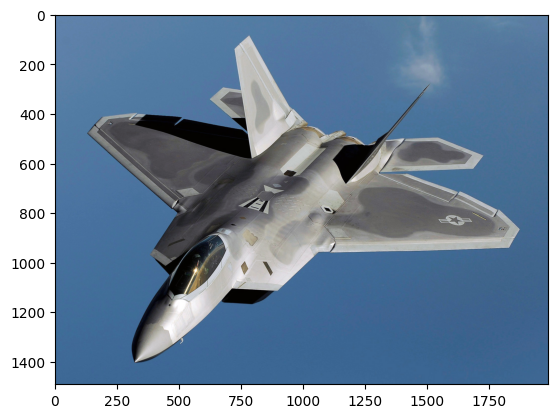

In [5]:
img = Image.open('F-22_Raptor.jpeg')
plt.imshow(img)

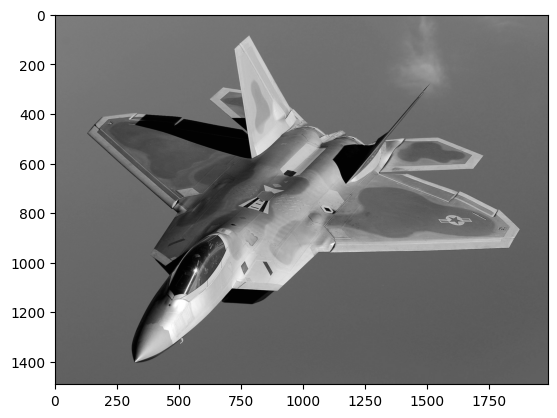

In [7]:
imggray = img.convert('LA')
plt.imshow(imggray)

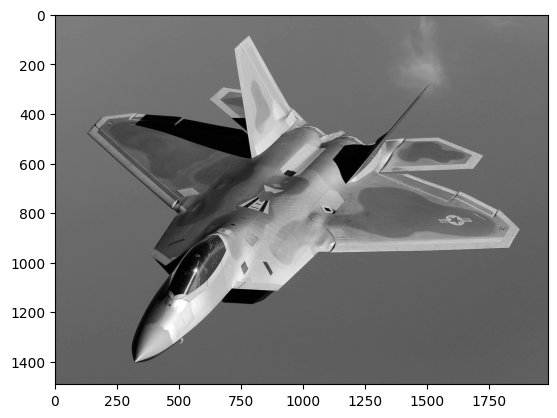

In [8]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.imshow(imgmat, cmap='gray')

In [9]:
U, sigma, V = np.linalg.svd(imgmat)

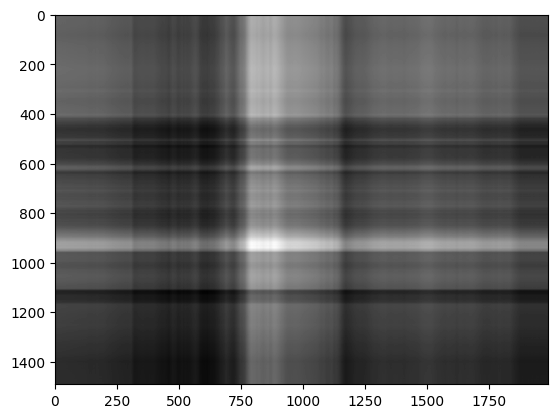

In [10]:
reconstimg = np.matrix(U[:,:1] * np.diag(sigma[:1]) * np.matrix(V[:1, :]))
plt.imshow(reconstimg, cmap='grey')

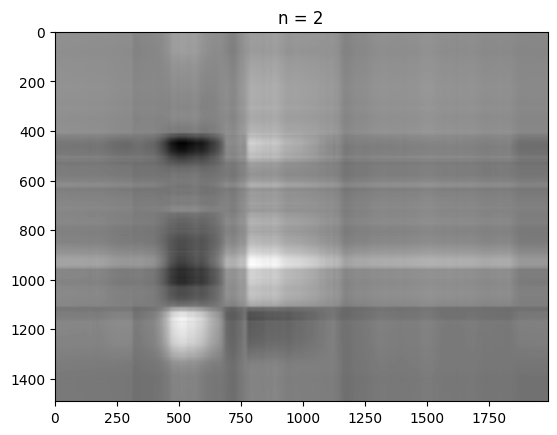

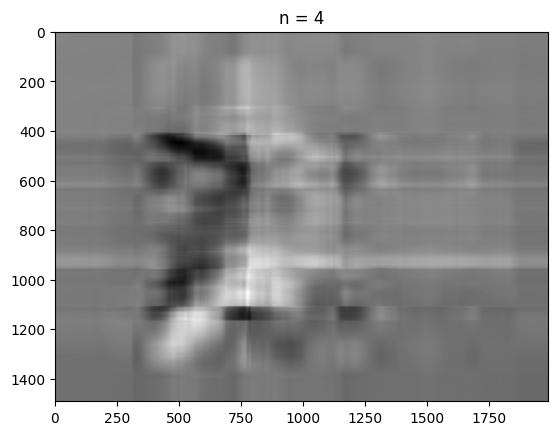

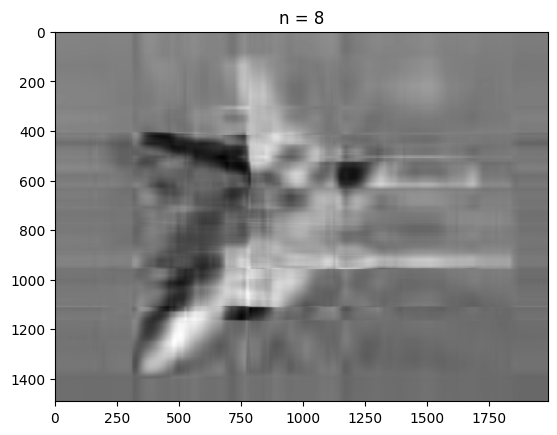

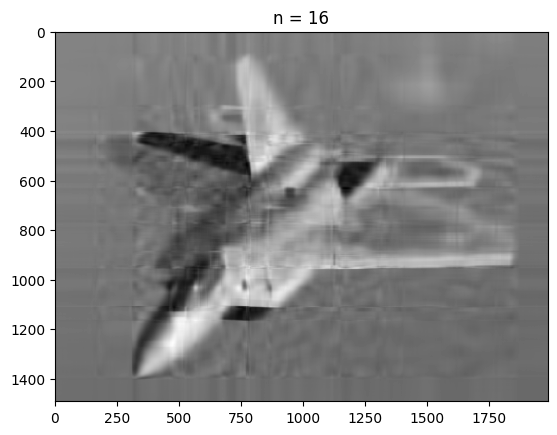

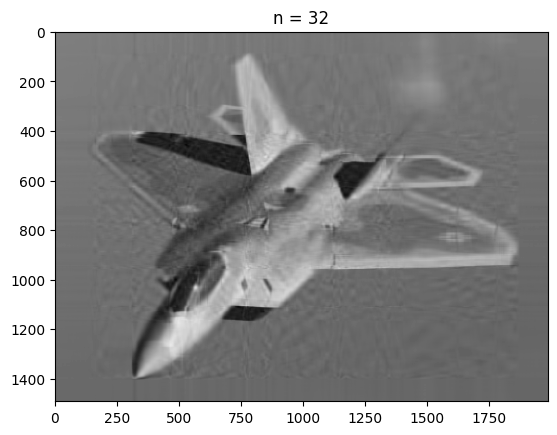

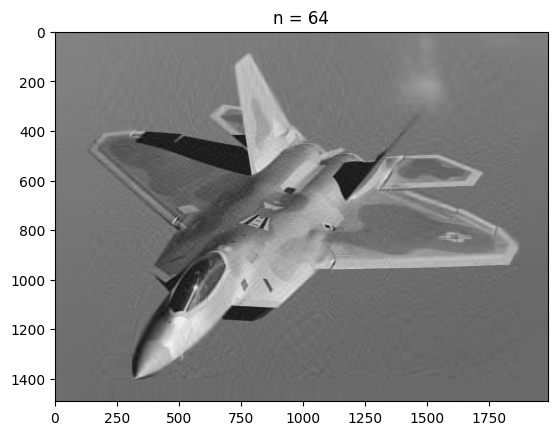

In [12]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:,:i] * np.diag(sigma[:i]) * np.matrix(V[:i, :]))
    plt.imshow(reconstimg, cmap='grey')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [13]:
imgmat.shape

(1491, 1988)

In [14]:
full_representation = 1988*1491
full_representation

2964108

In [15]:
svd64_rep = 64*1988 + 64+ 64*1491
svd64_rep

222720

In [16]:
svd64_rep/full_representation

0.07513896254792335

The Moore-Penrose Pseudoinverse - used to solve the inverse of a matrix that isn't square

In [19]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [20]:
U, d, VT = np.linalg.svd(A)

In [21]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [22]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [23]:
d

array([8.66918448, 4.10429538])

In [25]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [26]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

In [27]:
A.shape[0]

3

In [28]:
A.shape[1]

2

In [29]:
Dplus = np.zeros((3,2)).T
Dplus

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
Dplus[:2,:2] = Dinv
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [31]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [32]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Excersie: Use torch.svd() method to calculate the pseudoinverse of A_p, confirming that your results match the output of torch.piinverse(A_p)

In [35]:
A_p = torch.tensor([[-1,2],[3,-2],[5,7.]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [36]:
U, S, Vh = torch.linalg.svd(A_p)

In [37]:
U

tensor([[ 0.1271,  0.4741,  0.8713],
        [ 0.0016, -0.8785,  0.4778],
        [ 0.9919, -0.0593, -0.1124]])

In [38]:
S

tensor([8.6692, 4.1043])

In [50]:
D_p = torch.diag(S)
D_p

tensor([[8.6692, 0.0000],
        [0.0000, 4.1043]])

In [39]:
Vh

tensor([[ 0.5580,  0.8298],
        [-0.8298,  0.5580]])

In [53]:
Dplus_p = torch.zeros((3,2)).T
Dplus_p

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [55]:
Dinv_p = torch.linalg.inv(D_p)
Dinv_p

tensor([[0.1154, 0.0000],
        [0.0000, 0.2436]])

In [56]:
Dplus_p[:2,:2] = Dinv_p
Dplus_p

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364722, 0.        ]])

In [60]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

Moore-Penrose Pseudoinverse

Principal Component Analysis